# Land Eligibility for Wind Turbines

# Task1a

In [7]:

import pandas as pd
import rasterio as rs
import atlite as at
import geopandas as gpd
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
import numpy as np
from atlite.gis import ExclusionContainer
from urllib.request import urlretrieve
from atlite.gis import shape_availability
from rasterio.plot import show

# Task 1b

In [27]:
Data_set= {
    "Value": [1, 2, 3, 9, 10, 11,
              12, 13, 18, 19, 21, 
              26,28, 29, 32],
    "Code": [
        111, 112, 121, 133, 141, 142, 
        211, 212, 231, 241,  243, 
        321, 323, 324, 333
    ],
    "Description": [
        "Continuous urban fabric",
        "Discontinuous urban fabric",
        "Industrial or commercial units",
        "Construction sites",
        "Green urban areas",
        "Sport and leisure facilities",
        "Non-irrigated arable land",
        "Permanently irrigated land",
        "Pastures",
        "Annual crops associated with permanent crops",
        "Complex cultivation patterns",
        "Land principally occupied by agriculture with significant areas of natural vegetation",
        "Sclerophyllous vegetation",
        "Transitional woodland-shrub",
        "Sparsely vegetated areas"
    ],
    "Inclusion_Exclusion": [
        "Exclusion - 12000m",
        "Exclusion - 12000m",
        "Exclusion - 12000m",
        "Exclusion - 12000m",
        "Exclusion - 12000m",
        "Exclusion - 12000m",
        " NaN",
        "NaN",
        "NaN",
        "NaN",
        " NaN",
        "NaN",
        "NaN",
        "NaN",
        " NaN"
    ]
}


In [31]:
# (a) classes to which a distance should be kept
exc_classes = [1, 2, 3, 9, 10, 11]

# (b) classes deemed eligible for wind development
inc_classes = [12, 13, 18, 19, 21, 26,28, 29, 32]

# Iterate through the entries and print the required information for exclusion labels
print("Exclusion Classes:")
for i in range(len(Data_set["Value"])):
    code = Data_set["Value"][i]
    description = Data_set["Description"][i]
    inclusion_exclusion = Data_set["Inclusion_Exclusion"][i]
    
    if code in exc_classes:
        print(f"Label: {code}, Description: {description}, Inclusion/Exclusion: {inclusion_exclusion}")

# Iterate through the entries and print the required information for inclusion labels
print("\nInclusion Classes:")
for i in range(len(Data_set["Value"])):
    code = Data_set["Value"][i]
    description = Data_set["Description"][i]
    inclusion_exclusion = Data_set["Inclusion_Exclusion"][i]
    
    if code in inc_classes:
        print(f"Label: {code}, Description: {description}, Inclusion/Exclusion: {inclusion_exclusion}")


Exclusion Classes:
Label: 1, Description: Continuous urban fabric, Inclusion/Exclusion: Exclusion - 12000m
Label: 2, Description: Discontinuous urban fabric, Inclusion/Exclusion: Exclusion - 12000m
Label: 3, Description: Industrial or commercial units, Inclusion/Exclusion: Exclusion - 12000m
Label: 9, Description: Construction sites, Inclusion/Exclusion: Exclusion - 12000m
Label: 10, Description: Green urban areas, Inclusion/Exclusion: Exclusion - 12000m
Label: 11, Description: Sport and leisure facilities, Inclusion/Exclusion: Exclusion - 12000m

Inclusion Classes:
Label: 12, Description: Non-irrigated arable land, Inclusion/Exclusion:  NaN
Label: 13, Description: Permanently irrigated land, Inclusion/Exclusion: NaN
Label: 18, Description: Pastures, Inclusion/Exclusion: NaN
Label: 19, Description: Annual crops associated with permanent crops, Inclusion/Exclusion: NaN
Label: 21, Description: Complex cultivation patterns, Inclusion/Exclusion:  NaN
Label: 26, Description: Land principall

# Task 1c

In [32]:
in_source="https://tubcloud.tu-berlin.de/s/7bpHrAkjMT3ADSr/download/country_shapes.geojson"
cntry_shp = gpd.read_file(in_source).set_index('name')
exc= ExclusionContainer(crs=3035)
Lxmberg = cntry_shp.to_crs(exc.crs).loc[["LU"]].geometry
Lxmberg

name
LU    POLYGON ((4043458.177 3008253.833, 4042879.385...
Name: geometry, dtype: geometry

# Task 1d

The percentage of area excluded by natural protection areas is 24.187 %


/var/folders/d3/5j131h193zl4dd728sc732ym0000gn/T/ipykernel_47976/3303720599.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cntry_area = Lxmberg.geometry.area[0]


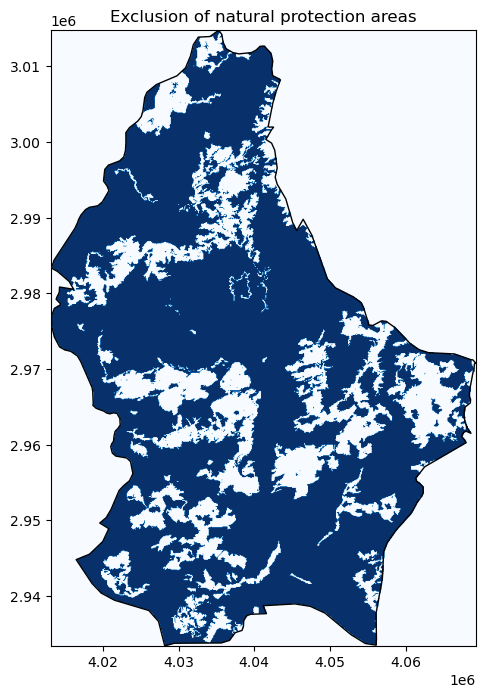

In [33]:
#1)To exclusion of  natural protection areas
data= "https://tubcloud.tu-berlin.de/s/zPMqJFPD8tKq2Ss/download/Natura2000_end2021-LU.gpkg"
exc = ExclusionContainer(crs=3035)
exc.add_geometry(data)

band, transform1 = shape_availability(Lxmberg, exc)

fig, ax1 = plt.subplots(figsize=(8, 8))
Lxmberg.plot(ax=ax1, color="none")
show(band, transform=transform1, cmap="Blues", ax=ax1)
plt.title("Exclusion of natural protection areas")

eligible = band.sum()
area = exc.res**2
eligible_area = area * eligible
cntry_area = Lxmberg.geometry.area[0]

exc = (1 - eligible_area/cntry_area)*100
print("The percentage of area excluded by natural protection areas is" ,round(exc,3), "%")

The percentage of area excluded of a radius of 7 km around airports is 3.009 %


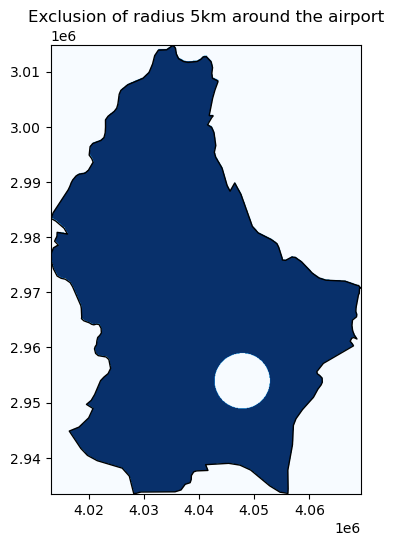

In [34]:
#2)exclusion of a radius of 5 km around airports
data1 = " https://tubcloud.tu-berlin.de/s/TbEJ9Lsy9EpTcQS/download/ne_10m_airports.gpkg"
exc1 = ExclusionContainer(crs=3035)
exc1.add_geometry(data1,buffer=5000)

band1, transform1 = shape_availability(Lxmberg, exc1)

fig1, ax1 = plt.subplots(figsize=(4, 8))
Lxmberg.plot(ax=ax1, color="none")
show(band1, transform=transform1, cmap="Blues", ax=ax1)
plt.title("Exclusion of radius 5km around the airport")

eligible1 = band1.sum()
area1 = exc1.res**2
eligible1= np.float64(eligible1)
area1 = np.float64(area1)
eligible_area1 = area1 * eligible1

exc1 = (1 - eligible_area1/cntry_area)*100
print("The percentage of area excluded of a radius of 7 km around airports is",round(exc1,3),"%")

The percentage of area excluded by a buffer of 500m next to major roads is 8.861 %


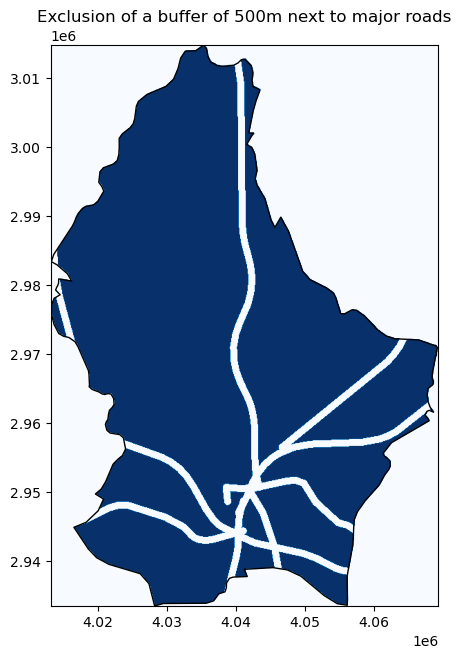

In [35]:
#3)exclusion of a buffer of 500m next to major roads
data2 = "https://tubcloud.tu-berlin.de/s/zcKQ95TgpyMJb8E/download/ne_10m_roads.gpkg"
exc2 = ExclusionContainer(crs=3035)
exc2.add_geometry(data2, buffer=500)

band2, transform2 = shape_availability(Lxmberg, exc2)

fig2, ax2 = plt.subplots(figsize=(5, 10))
Lxmberg.plot(ax=ax2, color="none")
show(band2, transform=transform2, cmap="Blues", ax=ax2)
plt.title("Exclusion of a buffer of 500m next to major roads")

eligible2 = band2.sum()
area2 = exc2.res**2
eligible2 = np.float64(eligible2)
area2 = np.float64(area2)
eligible_area2 = area2 * eligible2
eligible_area2/cntry_area
exc2 = (1 - eligible_area2/cntry_area)*100
print("The percentage of area excluded by a buffer of 500m next to major roads is", round(exc2,3), "%")

 Exclusion of a distance of 1200m around the following CORINE land cover classes: 111, 112, 121,133, 141, 142 is 68.309  %


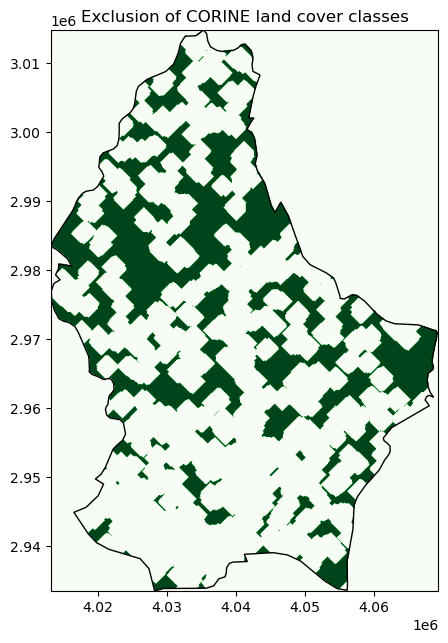

In [36]:
#4)Exclusion of a distance of 1200m around the following CORINE land cover classes: 111, 112, 121,133, 141, 142
#data3 = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
data3=rs.open('U2018_CLC2018_V2020_20u1-LU_4.tiff')
exc3 = ExclusionContainer(crs=3035)
exc3.add_raster(data3, codes =exc_classes , buffer=1200)

band3, transform3 = shape_availability(Lxmberg, exc3)

fig3, ax3 = plt.subplots(figsize=(5, 10))
Lxmberg.plot(ax=ax3, color="none")
show(band3, transform=transform3, cmap="Greens", ax=ax3)
plt.title("Exclusion of CORINE land cover classes")

eligible3 = band3.sum()
area3 = exc3.res**2
eligible3 = np.float64(eligible3)
area3 = np.float64(area3)
eligible_area3 = area3 * eligible3

exc3 = (1 - eligible_area3/cntry_area)*100
print(" Exclusion of a distance of 1200m around the following CORINE land cover classes: 111, 112, 121,133, 141, 142 is", round(exc3,3)," %")

Area included by a distance of CORINE land cover classes  211, 212, 231, 241, 243, 321, 323, 324, 333 is 39.442  %


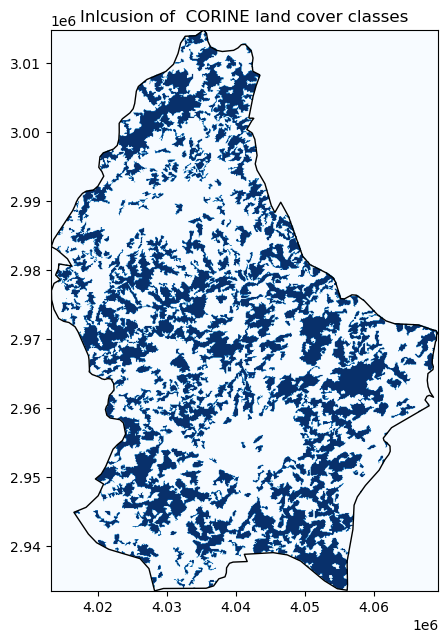

In [37]:
#5)inclusion only of the following CORINE land cover classes, which are deemed suitable for con- structing wind turbines: 211, 212, 231, 241, 243, 321, 323, 324, 333

#data4 = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
data4=rs.open('U2018_CLC2018_V2020_20u1-LU_5.tiff')
exc4 = ExclusionContainer(crs=3035)
exc4.add_raster(data4, codes =inc_classes , crs=3035, invert=True )

band4, transform4 = shape_availability(Lxmberg, exc4)

fig4, ax4 = plt.subplots(figsize=(5, 10))
Lxmberg.plot(ax=ax4, color="none")
show(band4, transform=transform4, cmap="Blues", ax=ax4)
plt.title("Inlcusion of  CORINE land cover classes")

eligible4 = band4.sum()
area4 = exc4.res**2
eligible4 = np.float64(eligible4)
area4 = np.float64(area4)
eligible_area4 = area4 * eligible4

exc4 = (1 - eligible_area4/cntry_area)*100
inc = (100 - exc4 )
print("Area included by a distance of CORINE land cover classes  211, 212, 231, 241, 243, 321, 323, 324, 333 is", round(inc,3)," %")

# Task 1e

In [38]:
#Plot and calculate (in %) the area available for the development of wind parks considering all exclusion and inclusion criteria together?

The percentage of area available for the development of wind parks considering all inclusion zones together is 8.68 %


/var/folders/d3/5j131h193zl4dd728sc732ym0000gn/T/ipykernel_47976/2850447697.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  country_area = Lxmberg.geometry.area[0]


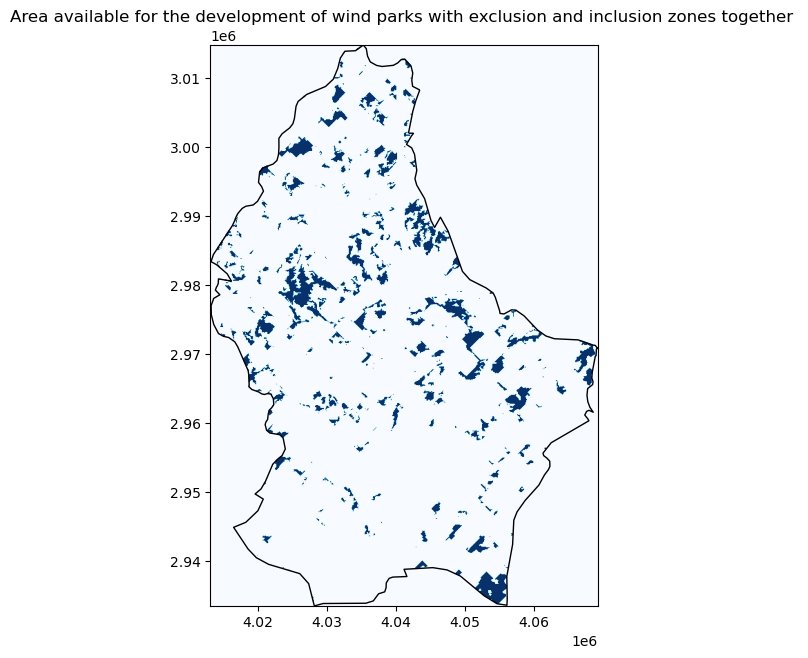

In [39]:
exc5 = ExclusionContainer(crs=3035)
exc5.add_geometry(data)

exc5.add_geometry(data1, buffer=5000)
exc5.add_geometry(data2, buffer=500)
exc5.add_raster(data3, codes=exc_classes, buffer=1200)
exc5.add_raster(data4, codes=inc_classes, invert=True)

band, transform = shape_availability(Lxmberg, exc5)

fig, ax = plt.subplots(figsize=(5, 10))
Lxmberg.plot(ax=ax, color="none")
show(band, transform=transform, cmap="Blues", ax=ax)
plt.title("Area available for the development of wind parks with exclusion and inclusion zones together ")

eligible = band.sum()
area = exc5.res**2
eligible_area = area * eligible
country_area = Lxmberg.geometry.area[0]

print(f"The percentage of area available for the development of wind parks considering all inclusion zones together is {eligible_area/country_area*100:.2f} %")

# Task 1f

Text(0.5, 1.0, 'Sensitivity Analysis change of buffer areas')

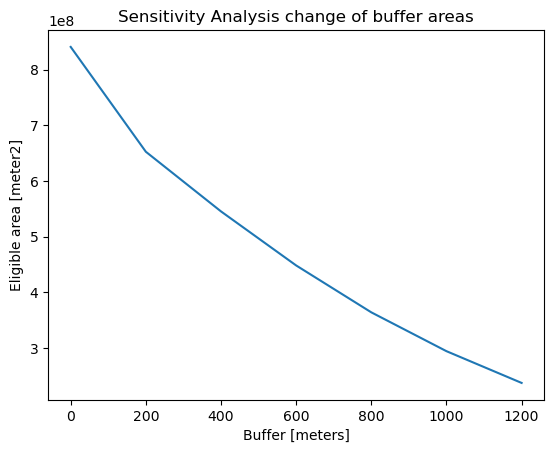

In [40]:
buf = [0, 200, 400, 600, 800, 1000, 1200]
eligible_area_for_buffer = []
for x in buf:
    excluder = ExclusionContainer(crs=3035)
    excluder.add_geometry(data)
    excluder.add_geometry(data1)
    excluder.add_geometry(data2)
    excluder.add_raster(data3, codes=exc_classes, buffer=x)
    excluder.add_raster(data4, codes=inc_classes, invert=True)
    
    band, transform = shape_availability(Lxmberg, excluder)
    eligible = band.sum()
    cell_area = excluder.res**2
    eligible_area = cell_area * eligible
    eligible_area_for_buffer.append(eligible_area)
    
plt.plot(buf, eligible_area_for_buffer)
plt.xlabel("Buffer [meters]")
plt.ylabel("Eligible area [meter2]")
plt.title("Sensitivity Analysis change of buffer areas")

# task 1g

In [41]:
ar800=eligible_area_for_buffer[5]/1000000 #km2
cap_fac = 0.32 
cap_den= 5 #MW/km2
tot_enrgy = (ar800 * cap_fac * cap_den * 365 * 24) / 1e6 
print("Total energy produced every year in Luxemberg from this wind plant at the buffer of 800 meters",round(tot_enrgy,2),"TWh")

Total energy produced every year in Luxemberg from this wind plant at the buffer of 800 meters 4.13 TWh
